## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset**, which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [3]:
import pandas as pd

# URL to the CSV file
url = "https://github.com/kflisikowski/ds/raw/master/headache.csv"

# Load the data into a DataFrame
headache = pd.read_csv(url)

# Display the first few rows of the data
print(headache)

    id  gender  risk treatment  pain_score
0    1    male   low         X   79.311695
1    2    male   low         X   76.843399
2    3    male   low         X   70.832421
3    4    male   low         X   81.163944
4    5    male   low         X   75.052213
..  ..     ...   ...       ...         ...
67  68  female  high         Z   82.786300
68  69  female  high         Z   81.265636
69  70  female  high         Z   80.419553
70  71  female  high         Z   87.142265
71  72  female  high         Z   79.609041

[72 rows x 5 columns]


## Descriptive statistics

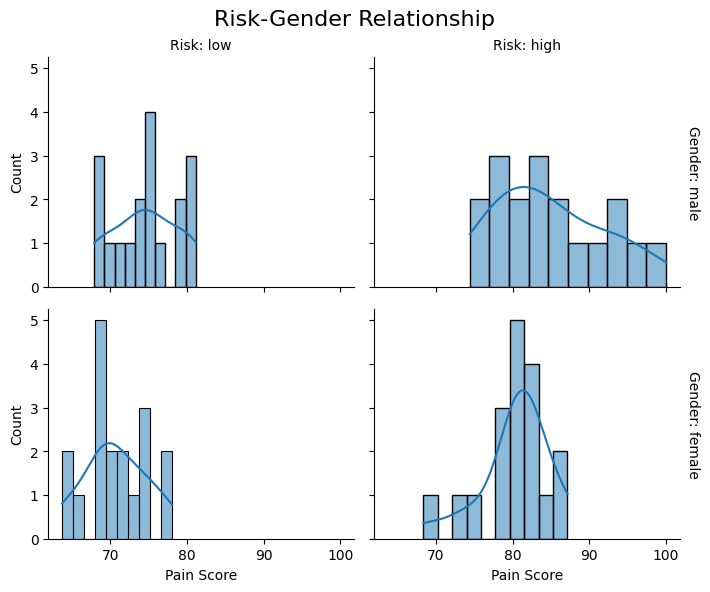

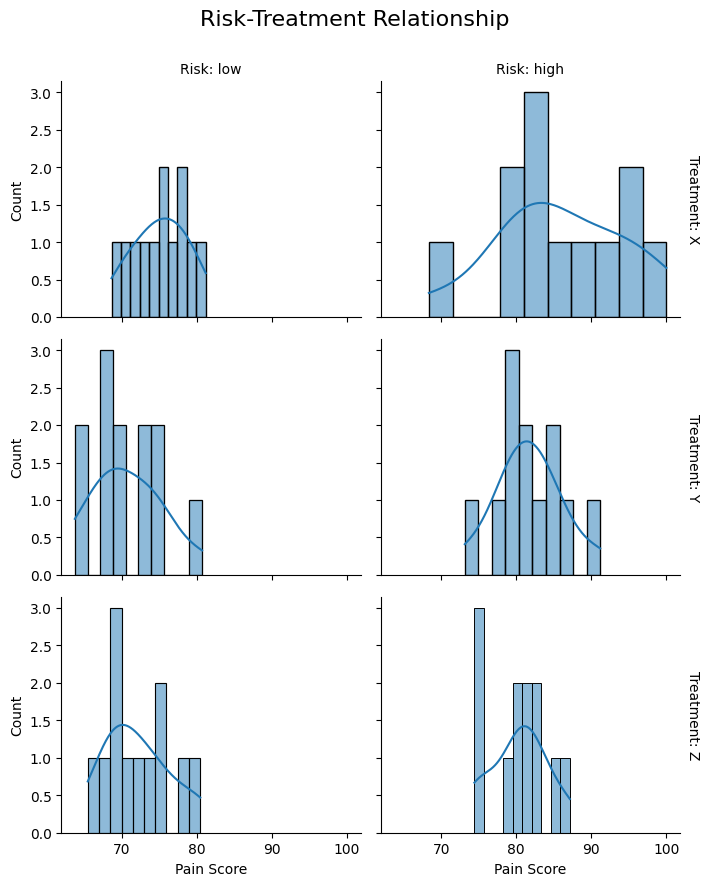

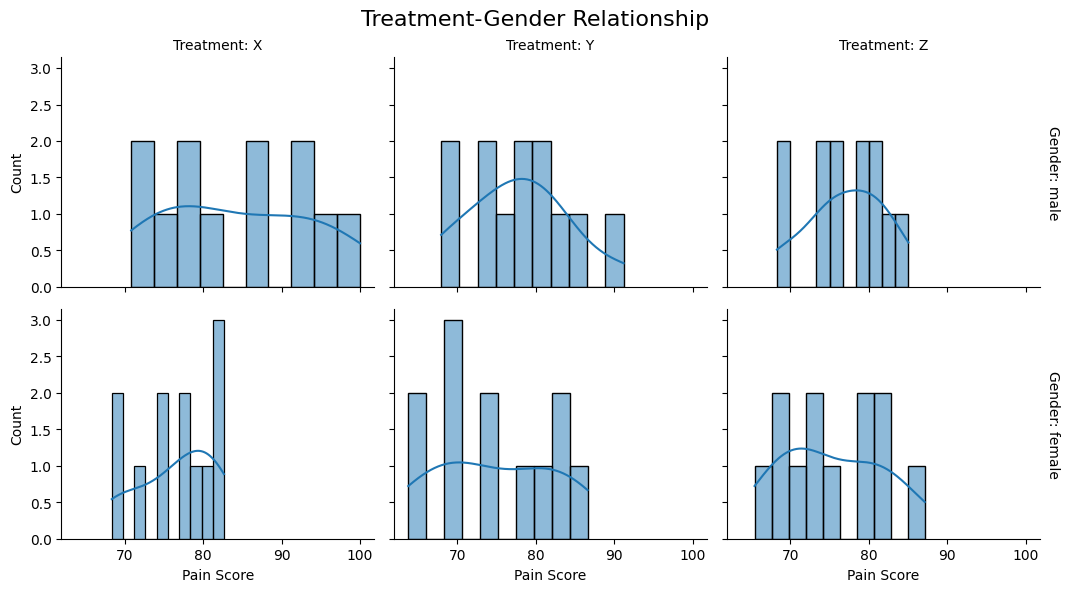

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create FacetGrid for risk-gender
g1 = sns.FacetGrid(headache, col="risk", row="gender", margin_titles=True, height=3, aspect=1.2)
g1.map_dataframe(sns.histplot, x="pain_score", bins=10, kde=True)
g1.set_axis_labels("Pain Score", "Count")
g1.set_titles(col_template="Risk: {col_name}", row_template="Gender: {row_name}")
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Risk-Gender Relationship", fontsize=16)

# Create FacetGrid for risk-treatment
g2 = sns.FacetGrid(headache, col="risk", row="treatment", margin_titles=True, height=3, aspect=1.2)
g2.map_dataframe(sns.histplot, x="pain_score", bins=10, kde=True)
g2.set_axis_labels("Pain Score", "Count")
g2.set_titles(col_template="Risk: {col_name}", row_template="Treatment: {row_name}")
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle("Risk-Treatment Relationship", fontsize=16)

# Create FacetGrid for treatment-gender
g3 = sns.FacetGrid(headache, col="treatment", row="gender", margin_titles=True, height=3, aspect=1.2)
g3.map_dataframe(sns.histplot, x="pain_score", bins=10, kde=True)
g3.set_axis_labels("Pain Score", "Count")
g3.set_titles(col_template="Treatment: {col_name}", row_template="Gender: {row_name}")
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle("Treatment-Gender Relationship", fontsize=16)

plt.show()


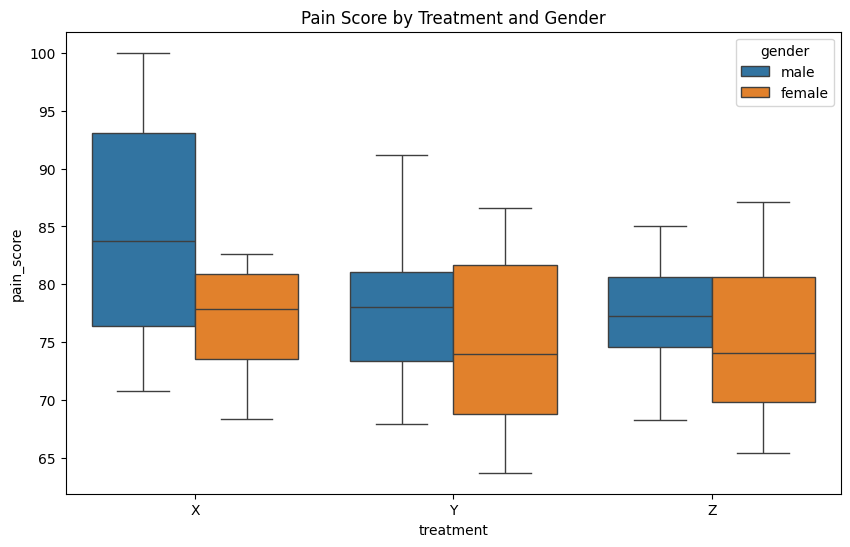

In [17]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=headache, x='treatment', y='pain_score', hue='gender')

# Add titles and labels
plt.title('Pain Score by Treatment and Gender')
plt.xlabel('treatment')
plt.ylabel('pain_score')

# Show the plot
plt.legend(title='gender')
plt.show()

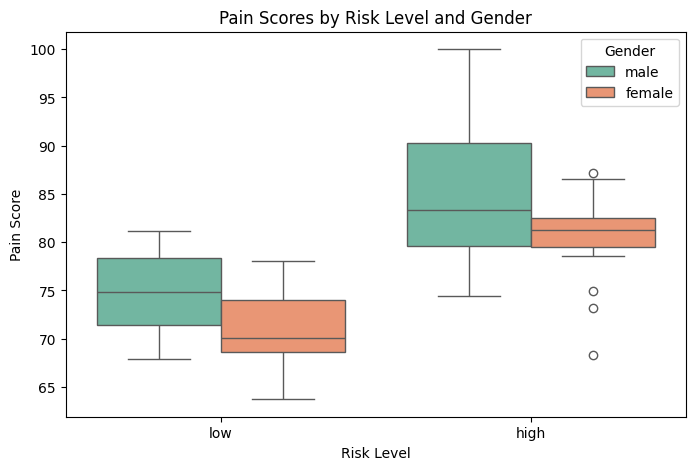

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="risk", y="pain_score", hue="gender", data=headache, palette="Set2")
plt.title("Pain Scores by Risk Level and Gender")
plt.xlabel("Risk Level")
plt.ylabel("Pain Score")
plt.legend(title="Gender")
plt.show()


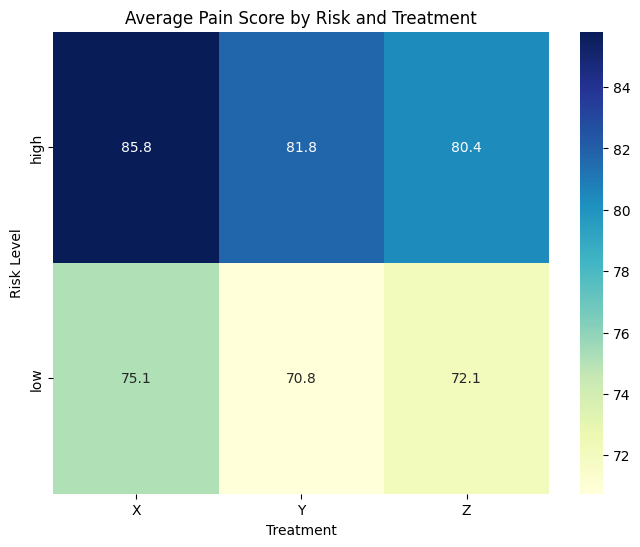

In [18]:
pivot = headache.pivot_table(index="risk", columns="treatment", values="pain_score", aggfunc="mean")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average Pain Score by Risk and Treatment")
plt.xlabel("Treatment")
plt.ylabel("Risk Level")
plt.show()


In [31]:
# Calculate descriptive statistics for pain score grouped by gender, risk, and treatment
desc_stats = headache.groupby(['gender', 'risk', 'treatment'])['pain_score'].describe()
print(desc_stats)

                       count       mean       std        min        25%  \
gender risk treatment                                                     
female high X            6.0  78.865059  5.316489  68.360185  79.142521   
            Y            6.0  81.175304  4.619387  73.144392  80.011223   
            Z            6.0  81.035142  3.984886  74.988057  79.811669   
       low  X            6.0  74.156231  3.690272  68.613936  72.005373   
            Y            6.0  68.361925  4.081842  63.732617  65.236456   
            Z            6.0  69.779555  2.719645  65.449408  68.866039   
male   high X            6.0  92.738847  5.116095  86.293706  88.907525   
            Y            6.0  82.341542  5.000898  77.524462  78.951861   
            Z            6.0  79.680736  4.045885  74.419865  76.602057   
       low  X            6.0  76.051783  3.854876  70.832421  73.593322   
            Y            6.0  73.138772  4.765061  67.923560  69.455207   
            Z            

## Assumptions

### Outliers

We can see the outliers already on the plot of pain score by gender and risk

In [34]:
outliers = pd.DataFrame()

for (risk, gender), group in headache.groupby(['risk', 'gender']):
    Q1 = group['pain_score'].quantile(0.25)
    Q3 = group['pain_score'].quantile(0.75)
    IQR = Q3 - Q1
    group_outliers = group[(group['pain_score'] < Q1 - 1.5 * IQR) | (group['pain_score'] > Q3 + 1.5 * IQR)]
    outliers = pd.concat([outliers, group_outliers])

print("Outliers detected:\n", outliers)

Outliers detected:
     id  gender  risk treatment  pain_score
56  57  female  high         X   68.360185
61  62  female  high         Y   73.144392
66  67  female  high         Z   74.988057
70  71  female  high         Z   87.142265


### Normality

In [49]:
from scipy.stats import shapiro
grouped = headache.groupby(['gender', 'risk', 'treatment'])

# Testing normality for each group
for name, group in grouped:
    stat, p = shapiro(group['pain_score'])
    print(f"Group {name} - Shapiro-Wilk Test: W = {stat:.3f}, p = {p:.3f}")
    if p > 0.05:
        print("  The group appears to be normally distributed.")
    else:
        print("  The group does not appear to be normally distributed.")
    


Group ('female', 'high', 'X') - Shapiro-Wilk Test: W = 0.714, p = 0.009
  The group does not appear to be normally distributed.
Group ('female', 'high', 'Y') - Shapiro-Wilk Test: W = 0.939, p = 0.654
  The group appears to be normally distributed.
Group ('female', 'high', 'Z') - Shapiro-Wilk Test: W = 0.971, p = 0.901
  The group appears to be normally distributed.
Group ('female', 'low', 'X') - Shapiro-Wilk Test: W = 0.933, p = 0.600
  The group appears to be normally distributed.
Group ('female', 'low', 'Y') - Shapiro-Wilk Test: W = 0.927, p = 0.555
  The group appears to be normally distributed.
Group ('female', 'low', 'Z') - Shapiro-Wilk Test: W = 0.958, p = 0.801
  The group appears to be normally distributed.
Group ('male', 'high', 'X') - Shapiro-Wilk Test: W = 0.958, p = 0.808
  The group appears to be normally distributed.
Group ('male', 'high', 'Y') - Shapiro-Wilk Test: W = 0.902, p = 0.384
  The group appears to be normally distributed.
Group ('male', 'high', 'Z') - Shapiro-W

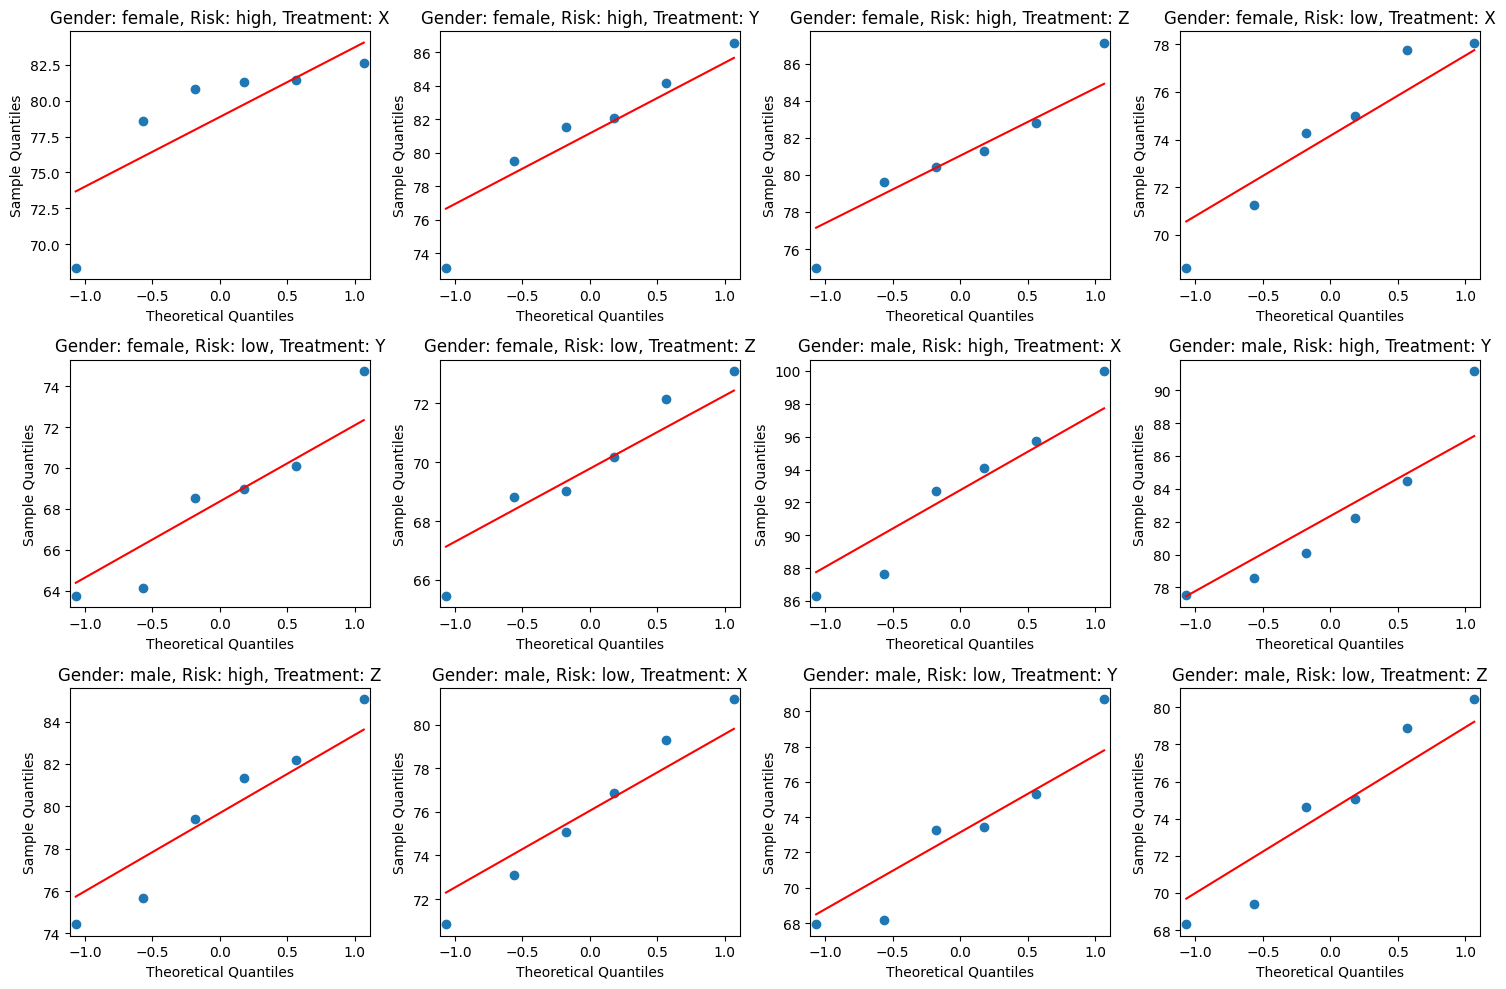

In [ ]:
from scipy.stats import probplot
import statsmodels.api as sm
grouped = headache.groupby(['gender', 'risk', 'treatment'])

fig, axes = plt.subplots(3, 4, figsize=(15, 10))  
axes = axes.flatten()

for i, (name, group) in enumerate(grouped):
    sm.qqplot(group['pain_score'], line='s', ax=axes[i])
    axes[i].set_title(f'Gender: {name[0]}, Risk: {name[1]}, Treatment: {name[2]}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Homogeneity of Variance

In [60]:
from scipy.stats import levene


grouped_data = headache.groupby(['risk', 'treatment', 'gender'])['pain_score'].apply(list)

# Perform Levene's test
stat, p = levene(*grouped_data)

print("Levene's Test: W = {:.3f}, p = {:.3f}".format(stat, p))
if p > 0.05:
    print("Variances are homogeneous.")
else:
    print("Variances are not homogeneous.")

Levene's Test: W = 0.179, p = 0.998
Variances are homogeneous.


## Anova

In [63]:
from statsmodels.formula.api import ols

model = ols('pain_score ~ gender * risk * treatment', data=headache).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  
print(anova_table)


                            sum_sq    df          F        PR(>F)
gender                  313.358773   1.0  16.195746  1.625409e-04
risk                   1793.555757   1.0  92.698774  8.799980e-14
treatment               283.168031   2.0   7.317679  1.432844e-03
gender:risk               2.730584   1.0   0.141128  7.084867e-01
gender:treatment        129.182324   2.0   3.338353  4.220011e-02
risk:treatment           27.595016   2.0   0.713115  4.942214e-01
gender:risk:treatment   286.595625   2.0   7.406255  1.334476e-03
Residual               1160.892871  60.0        NaN           NaN


## Post-hoc

Tukey HSD test for gender:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
female   male   4.1724 0.0172 0.7622 7.5826   True
--------------------------------------------------

Tukey HSD test for risk:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
  high    low  -9.9821   0.0 -12.6196 -7.3446   True
----------------------------------------------------

Tukey HSD test for treatment:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     X      Y  -4.1986 0.1242 -9.2716 0.8744  False
     X      Z  -4.2152 0.1222 -9.2881 0.8578  False
     Y      Z  -0.0166    1.0 -5.0895 5.0564  False
---------------------------------------------------


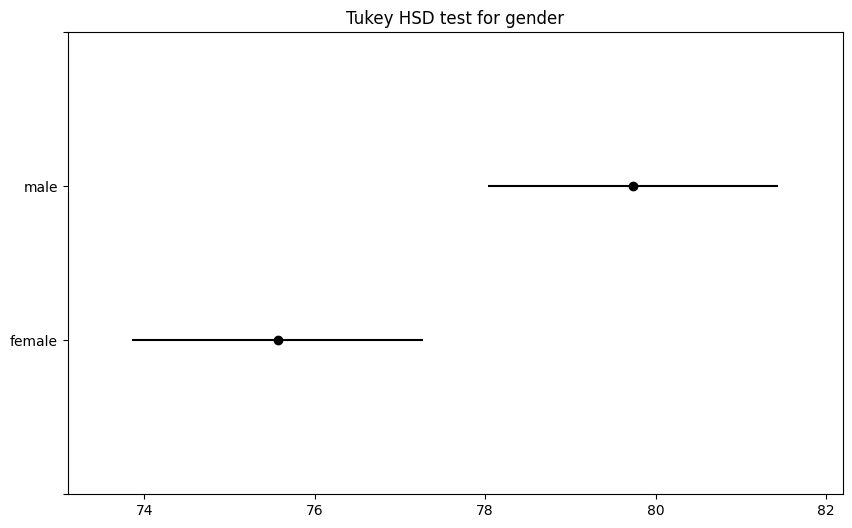

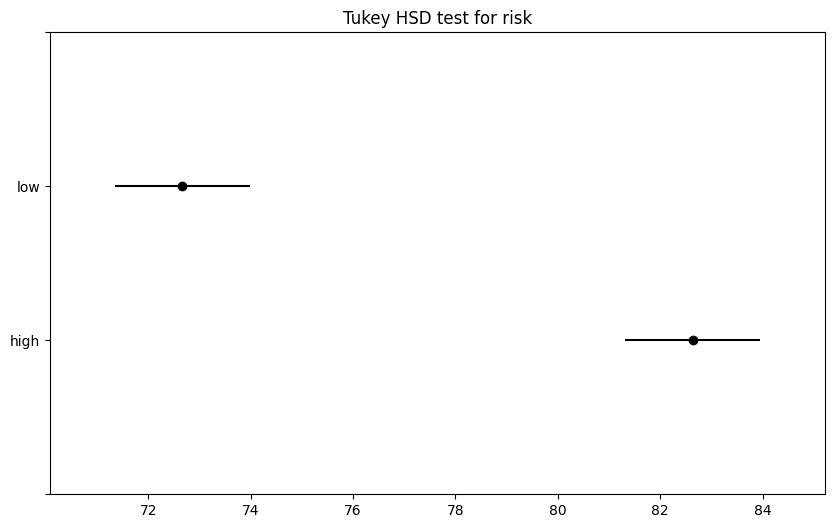

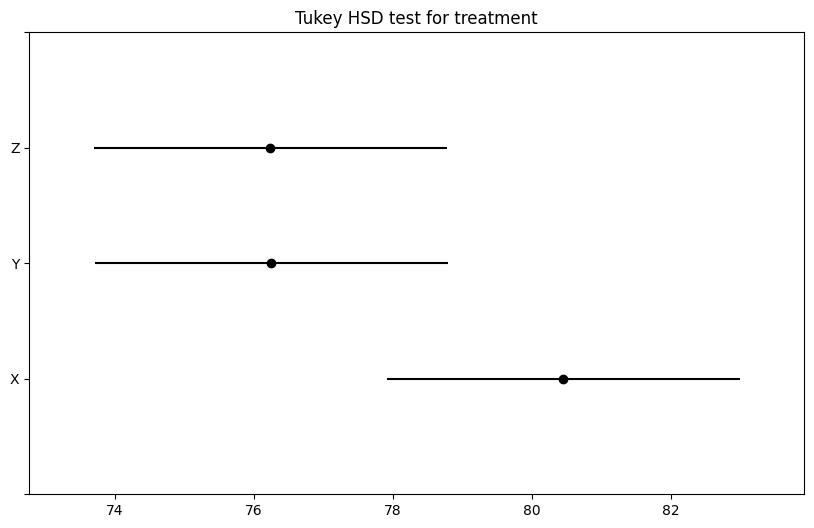

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_gender = pairwise_tukeyhsd(endog=headache['pain_score'], groups=headache['gender'], alpha=0.05)
tukey_risk = pairwise_tukeyhsd(endog=headache['pain_score'], groups=headache['risk'], alpha=0.05)
tukey_treatment = pairwise_tukeyhsd(endog=headache['pain_score'], groups=headache['treatment'], alpha=0.05)

print("Tukey HSD test for gender:")
print(tukey_gender)

print("\nTukey HSD test for risk:")
print(tukey_risk)

print("\nTukey HSD test for treatment:")
print(tukey_treatment)

tukey_gender.plot_simultaneous()
plt.title("Tukey HSD test for gender")
plt.show()

tukey_risk.plot_simultaneous()
plt.title("Tukey HSD test for risk")
plt.show()

tukey_treatment.plot_simultaneous()
plt.title("Tukey HSD test for treatment")
plt.show()


Tukey HSD test for gender:risk interaction:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2   meandiff p-adj   lower    upper  reject
--------------------------------------------------------------
female_high female_low  -9.5926    0.0 -14.2178 -4.9674   True
female_high  male_high   4.5619 0.0546  -0.0633  9.1871  False
female_high   male_low  -5.8097  0.008 -10.4349 -1.1845   True
 female_low  male_high  14.1545    0.0   9.5293 18.7797   True
 female_low   male_low   3.7829 0.1467  -0.8423  8.4081  False
  male_high   male_low -10.3716    0.0 -14.9968 -5.7464   True
--------------------------------------------------------------

Tukey HSD test for gender:treatment interaction:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
female_X female_Y   -1.742 0.9902 -10.1781   6.694  False
female_X female_Z  -1.1033 0.9989  -9.5393 

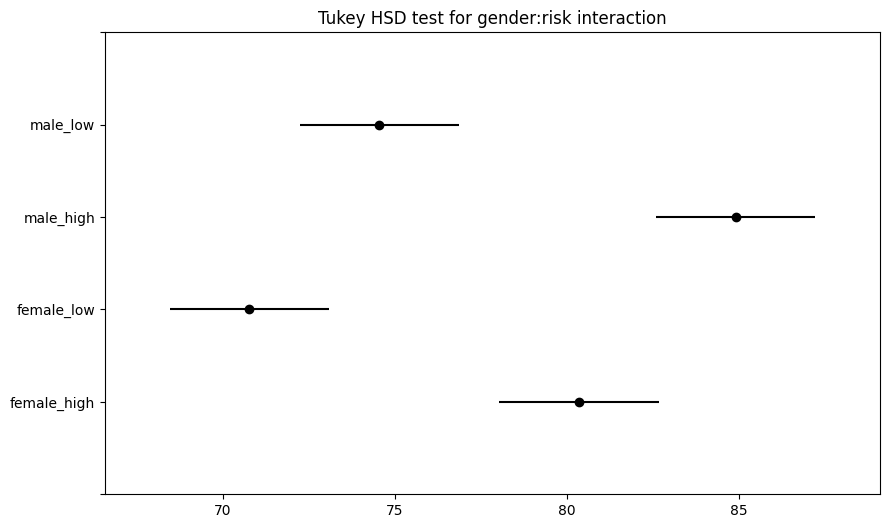

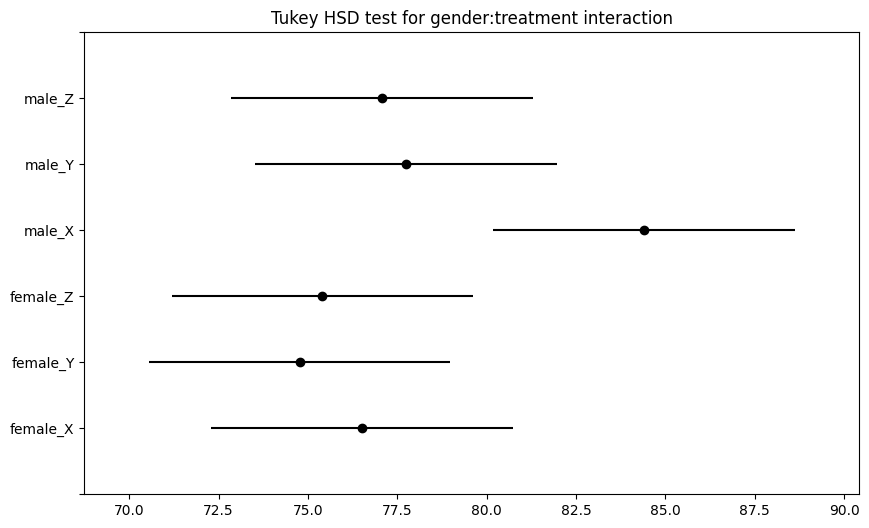

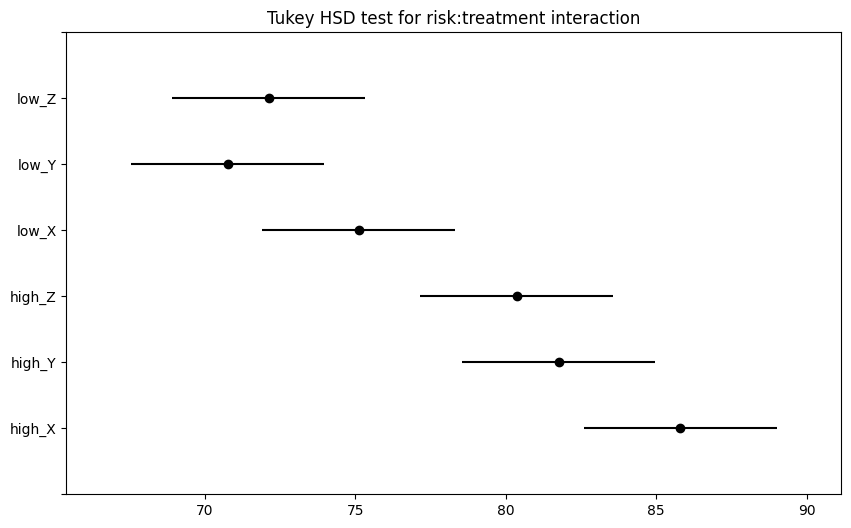

In [66]:
headache['gender_risk'] = headache['gender'].astype(str) + "_" + headache['risk'].astype(str)
headache['gender_treatment'] = headache['gender'].astype(str) + "_" + headache['treatment'].astype(str)
headache['risk_treatment'] = headache['risk'].astype(str) + "_" + headache['treatment'].astype(str)

tukey_gender_risk = pairwise_tukeyhsd(endog=headache['pain_score'], groups=headache['gender_risk'], alpha=0.05)
tukey_gender_treatment = pairwise_tukeyhsd(endog=headache['pain_score'], groups=headache['gender_treatment'], alpha=0.05)
tukey_risk_treatment = pairwise_tukeyhsd(endog=headache['pain_score'], groups=headache['risk_treatment'], alpha=0.05)

print("\nTukey HSD test for gender:risk interaction:")
print(tukey_gender_risk)

print("\nTukey HSD test for gender:treatment interaction:")
print(tukey_gender_treatment)

print("\nTukey HSD test for risk:treatment interaction:")
print(tukey_risk_treatment)

tukey_gender_risk.plot_simultaneous()
plt.title("Tukey HSD test for gender:risk interaction")
plt.show()

tukey_gender_treatment.plot_simultaneous()
plt.title("Tukey HSD test for gender:treatment interaction")
plt.show()

tukey_risk_treatment.plot_simultaneous()
plt.title("Tukey HSD test for risk:treatment interaction")
plt.show()